# Explore here

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

ds= pd.read_csv("/workspaces/Finarosalina_proyecto_EDA/data/raw/AB_NYC_2019.csv")


In [3]:
ds.info()  # revisamos numero de filas y columnas y valores nulos y tipología de forma general
# ds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# revisar si hay valores repetidos. No hay por ID :np.int64(0)
ds.drop("host_id", axis = 1).duplicated().sum()

# eliminar col que no aportan valor:
# host_name, name ya que no es el nombre completo, ademas hay nombres repetidos sin relación y no aportan valor al estudio de precio
# last_review 38843 non-null  object los datos son  incompletos y al represntarlos no aportan valor
# reviews_per_month 38843 non-null  float64 los datos son incompletos y al represntarlos no aportan valor
# Id no aporta información a la varación de precio y ya puedo identificar por host_id
# latitude y longitude, no aportan valor porque ya sé pueden ubicar por neighbourhood 

ds.drop(["host_name", "last_review", "reviews_per_month", "id", "latitude","longitude", "name",  ], axis = 1, inplace = True)  
ds.shape
ds.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [7]:
# Limpiar texto:

# Función de limpieza de texto
def clean_text(text):
    text = text.strip().lower()  # Convertir a minúsculas y eliminar espacios extra
    text = ''.join(e for e in text if e.isalnum() or e.isspace())  # Eliminar caracteres no alfabéticos (excepto espacio)
    return text

# Aplicar la función clean_text a todas las columnas que contienen texto
ds[ds.select_dtypes(include=["object"]).columns] = ds.select_dtypes(include=["object"]).applymap(clean_text)

print(ds.head())


   host_id neighbourhood_group neighbourhood       room_type  price  \
0     2787            brooklyn    kensington    private room    149   
1     2845           manhattan       midtown  entire homeapt    225   
2     4632           manhattan        harlem    private room    150   
3     4869            brooklyn  clinton hill  entire homeapt     89   
4     7192           manhattan   east harlem  entire homeapt     80   

   minimum_nights  number_of_reviews  calculated_host_listings_count  \
0               1                  9                               6   
1               1                 45                               2   
2               3                  0                               1   
3               1                270                               1   
4              10                  9                               1   

   availability_365  
0               365  
1               355  
2               365  
3               194  
4                 0  


/tmp/ipykernel_664/316302805.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ds[ds.select_dtypes(include=["object"]).columns] = ds.select_dtypes(include=["object"]).applymap(clean_text)


/tmp/ipykernel_627/1399035650.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Neighbourhood Groups', loc='upper right')


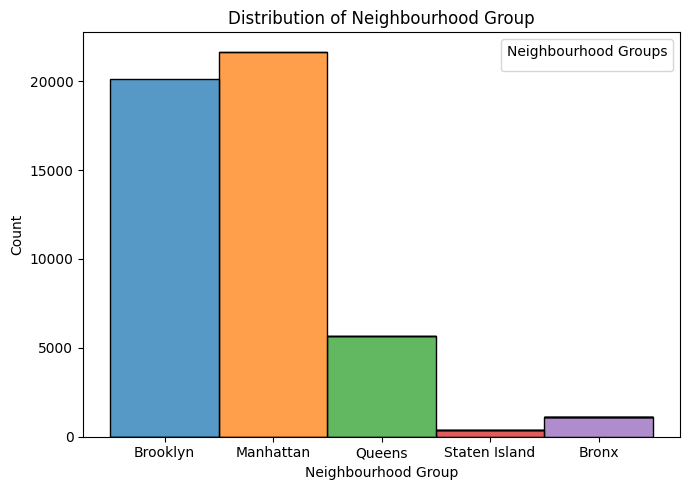

/home/vscode/.local/lib/python3.11/site-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
/tmp/ipykernel_627/1399035650.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Neighbourhood', loc='upper right')  # Adjust legend position if needed


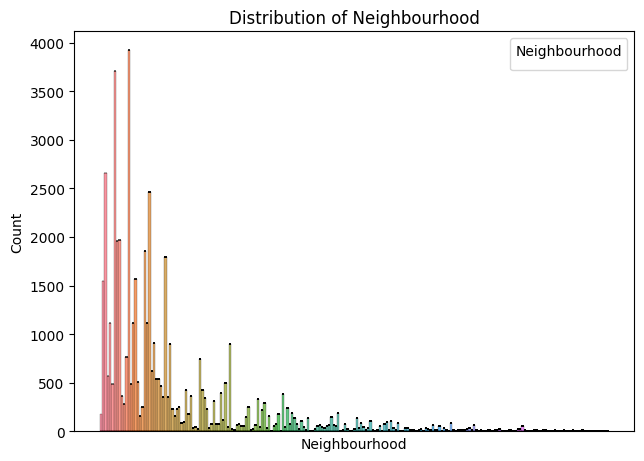

In [5]:

plt.figure(figsize=(7, 5))  # Necesito ver mejor las categóricas para que no se superpongan valores
sns.histplot(data=ds, x="neighbourhood_group", hue="neighbourhood_group", multiple="stack", legend=True)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Distribution of Neighbourhood Group')
plt.legend(title='Neighbourhood Groups', loc='upper right') 
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))  # Necesito ver mejor las categóricas para que no se superpongan valores
sns.histplot(data=ds, x="neighbourhood", hue="neighbourhood", multiple="stack", legend=True)
plt.xticks([])
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Neighbourhood')
plt.legend(title='Neighbourhood', loc='upper right')  # Adjust legend position if needed
# Ajuste manual de los márgenes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()




La distribicion muestral no es normal, hay zonas como Brooklin y Manhattan que cuentan con muchos mas registros que el resto. Neighbourhood, la mayor parte de valores está concentrada en una zona pequeña y el resto apenas es significativo.


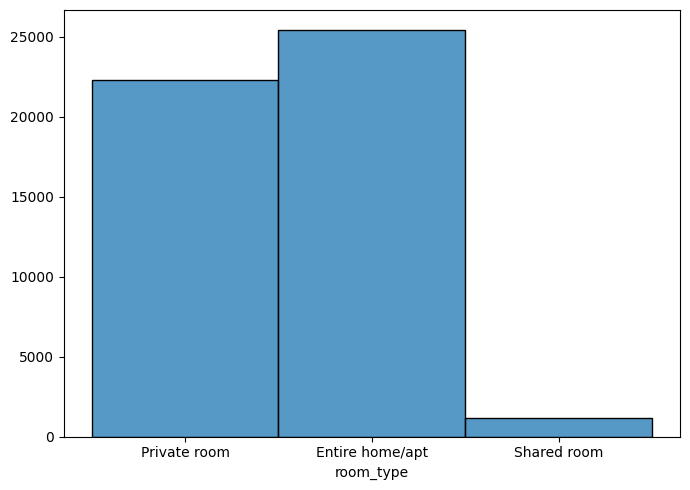

In [ ]:
plt.figure(figsize=(7, 5)) 
sns.histplot( data = ds, x = "room_type").set(ylabel = None)
plt.tight_layout()

plt.show()




Las preferencias a la hora de escoger habitación son claras, o se decanta por un apartamento ( mas de 500 registros) o por habitaciones privadas(sobre 450). A penas hay registros de habitaciones compartidas.

Variables numericas: host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365
availability_365 la considero numérica porque a pesar de no tomar valores infinitos, no todos sus valroes son iguales, ya que tener mucha disponibilidad es peor, y en teoría debería hacer que el precio bajase.


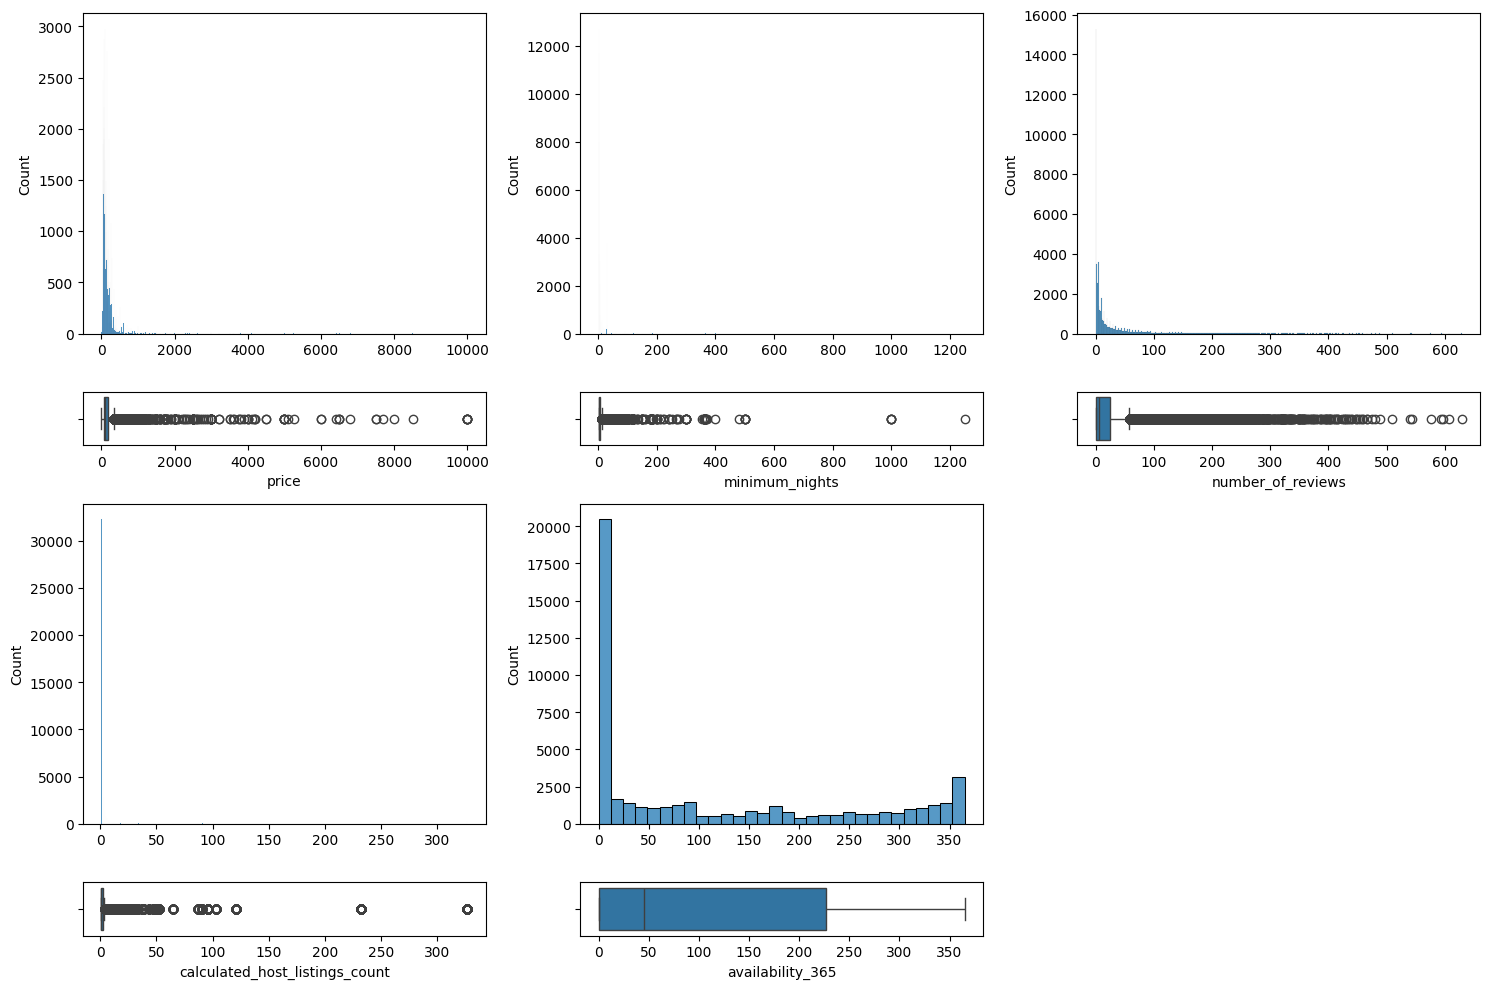

In [10]:
fig, axis = plt.subplots(4, 3, figsize=(15, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = ds, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = ds, x = "price")

sns.histplot(ax = axis[0, 1], data = ds, x = "minimum_nights").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = ds, x = "minimum_nights")

sns.histplot(ax = axis[0, 2], data = ds, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = ds, x = "number_of_reviews")

sns.histplot(ax = axis[2, 0], data = ds, x = "calculated_host_listings_count").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = ds, x = "calculated_host_listings_count")

sns.histplot(ax = axis[2, 1], data = ds, x = "availability_365").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = ds, x = "availability_365")

# Eliminar las posiciones vacías 
fig.delaxes(axis[2, 2])
fig.delaxes(axis[3, 2])

plt.tight_layout()
plt.show()


Sorprende la reprende la representación de la disponibilidad, es francamente baja para la mayoría de establecimientos, con medias inferiores a 50 días libres por año. Si bien es cierto que en un número menor de establecimientos si existe una mayor disponibilidad. En el resto de atribituos se aprecian outlayers, siendo en "número de noches" especialmetne significativo,superando las 1000 noches el ciertos casos, lo que indica que o bien los datos son erróneos (habría que revisar) o bien en ciertos casos se emplean como vivienda habitual.

** Análisis de variables multivariante **

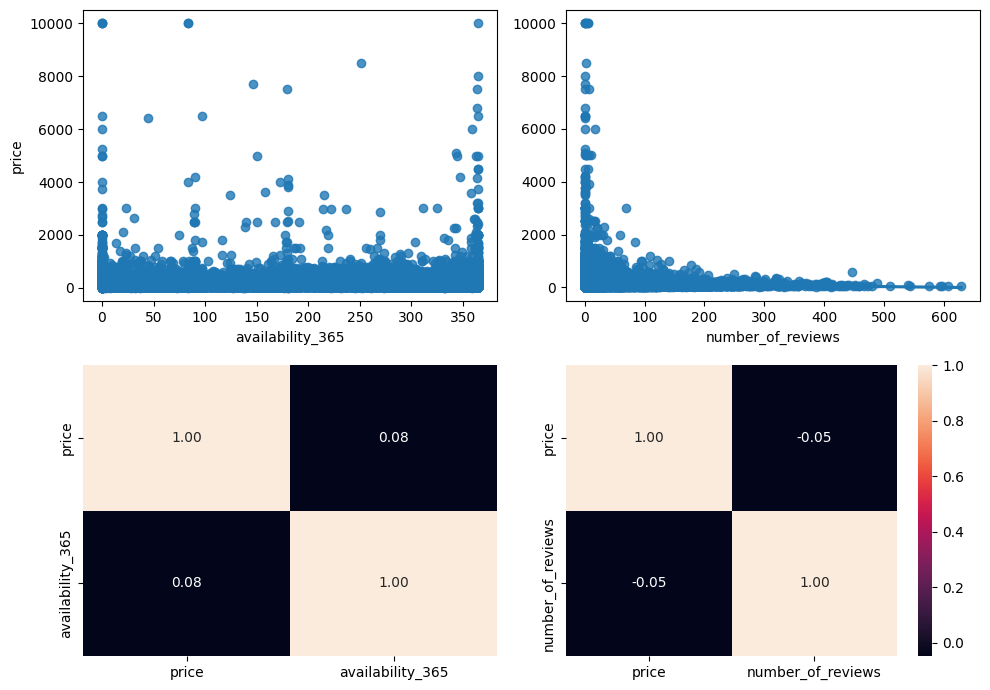

In [11]:
 # Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = ds, x = "availability_365", y = "price")
sns.heatmap(ds[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = ds, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(ds[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

No se aprecia relación de depencia, ni positiva ni negativa entre número de comentarios y disponibilidad con el precio.

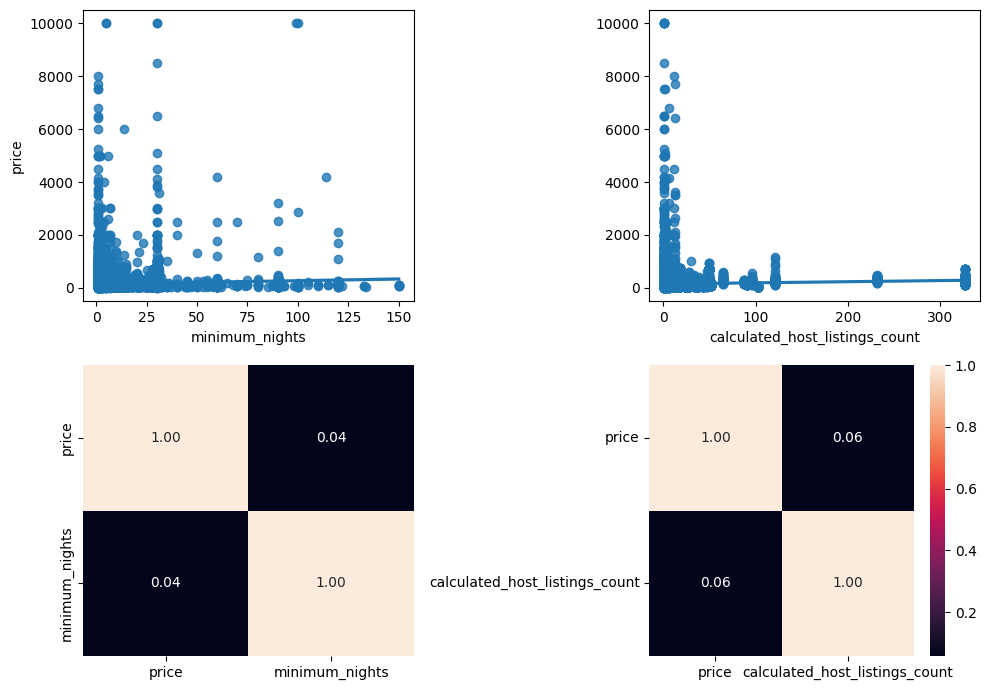

In [12]:
 # Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Filtrar los datos donde 'minimum_nights' sea menor o igual a 150 tras ver boxplot, para poder observar mejor
ds_filtrado = ds[ds['minimum_nights'] <= 150]

# Crear un gráfico de dispersión con los datos filtrados
sns.regplot(ax=axis[0, 0], data=ds_filtrado, x="minimum_nights", y="price")

sns.heatmap(ds[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = ds, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
sns.heatmap(ds[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

No se aprecia relación de depencia, ni positiva ni negativa entre número de numero minimo de noches y disponibilidad con el precio.

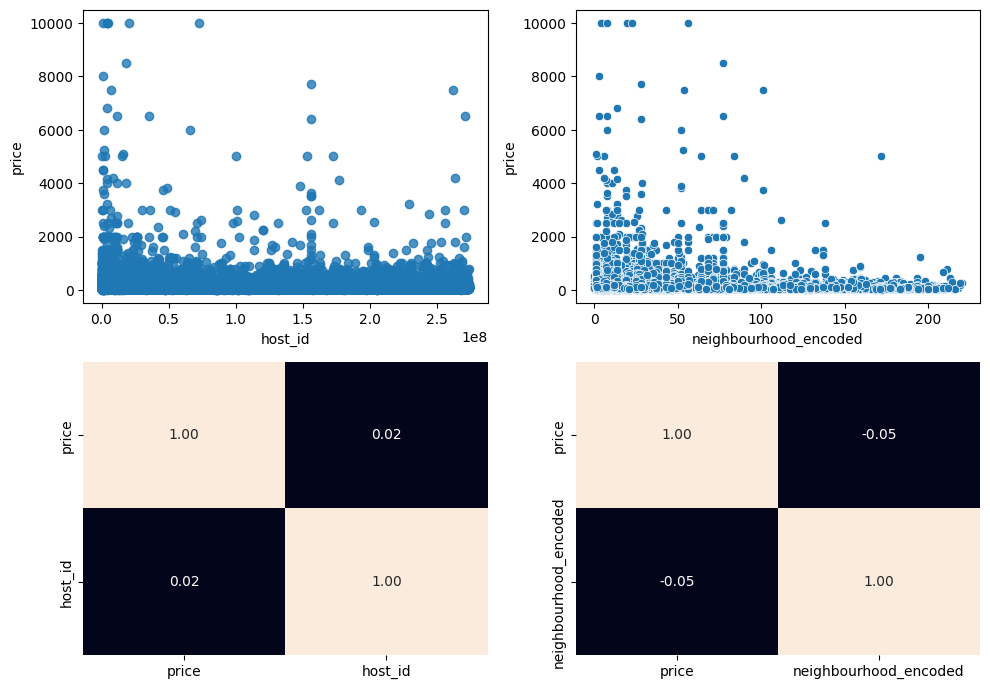

In [ ]:
# Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Convertir la columna 'neighbourhood_group' a valores numéricos
ds_limpio['neighbourhood_encoded'] = pd.factorize(ds_limpio['neighbourhood'])[0]

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = ds_limpio, x = "host_id", y = "price")
sns.heatmap(ds_limpio[["price", "host_id"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

# Usar la columna 'neighbourhood_group_encoded' para calcular la correlación
sns.heatmap(ds_limpio[["price", "neighbourhood_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)


sns.scatterplot(ax=axis[0, 1], data=ds_limpio, x="neighbourhood_encoded", y="price")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


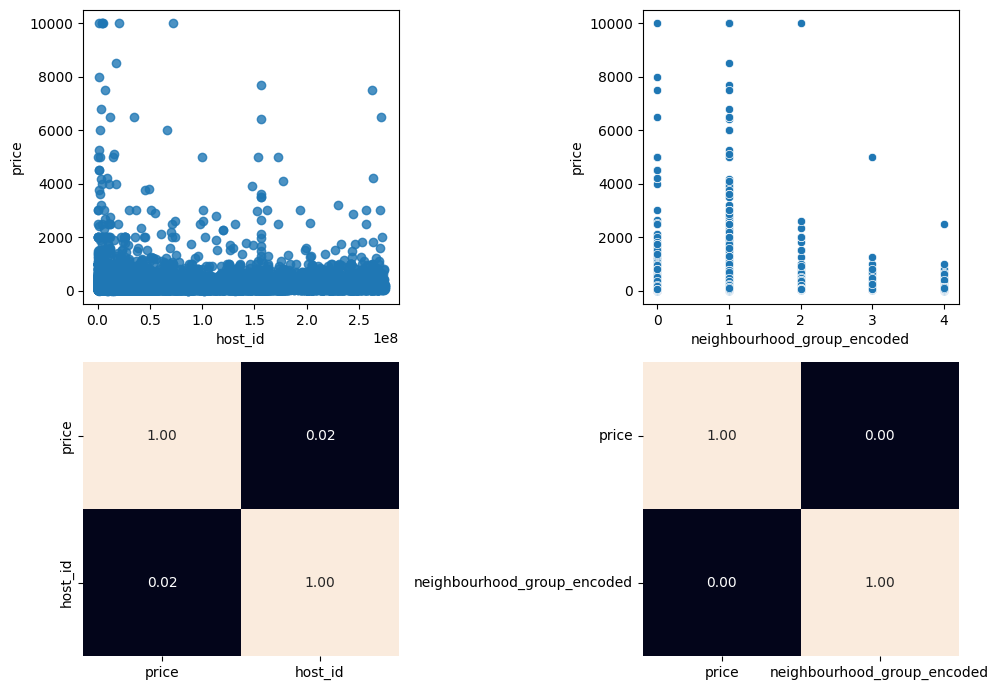

In [ ]:
# Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Convertir la columna 'neighbourhood_group' a valores numéricos
ds_limpio['neighbourhood_group_encoded'] = pd.factorize(ds_limpio['neighbourhood_group'])[0]

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = ds_limpio, x = "host_id", y = "price")
sns.heatmap(ds_limpio[["price", "host_id"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

# Usar la columna 'neighbourhood_group_encoded' para calcular la correlación
sns.heatmap(ds_limpio[["price", "neighbourhood_group_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Usar un gráfico de dispersión con la columna 'neighbourhood_group_encoded'
sns.scatterplot(ax=axis[0, 1], data=ds_limpio, x="neighbourhood_group_encoded", y="price")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


  neighbourhood_group  encoded_value
0            Brooklyn              0
1           Manhattan              1
2              Queens              2
3       Staten Island              3
4               Bronx              4

Análisis categórico-categórico

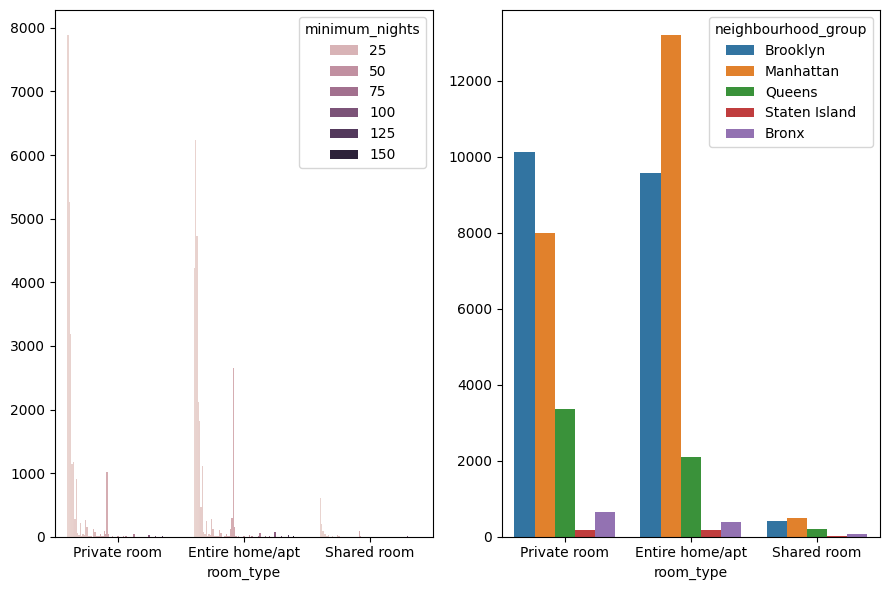

In [ ]:
fig, axis = plt.subplots(1, 2, figsize = (9, 6))
# Filtrar los datos donde 'minimum_nights' sea menor o igual a 150 tras ver boxplot
ds_filtrado = ds[ds['minimum_nights'] <= 150]

sns.countplot(ax = axis[0], data =ds_filtrado, x =  "room_type" , hue = "minimum_nights").set(ylabel = None)
sns.countplot(ax = axis[1], data =ds, x = "room_type", hue = "neighbourhood_group").set(ylabel = None)
plt.tight_layout()  
plt.show()


A la vista de estos valores, habría que eliminas estas columnas, ya que no aportan demasiada info, no ha corelaciones y además hay demasiados valores nulos.

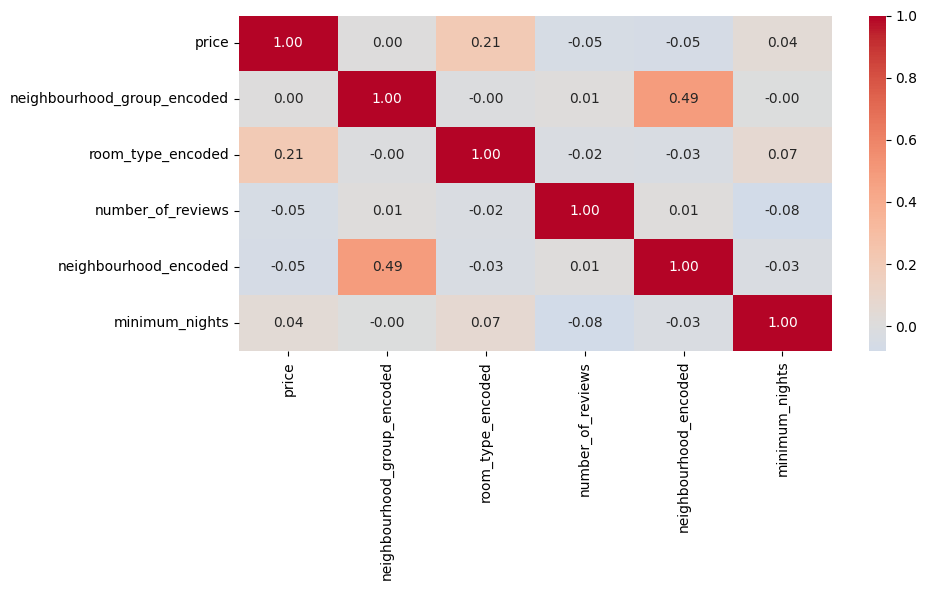

In [ ]:
# Convertir columnas categóricas en valores numéricos
ds["neighbourhood_group_encoded"] = pd.factorize(ds["neighbourhood_group"])[0]
ds["room_type_encoded"] = pd.factorize(ds["room_type"])[0]
ds["neighbourhood_encoded"] = pd.factorize(ds["neighbourhood"])[0]  # Codificar 'neighbourhood'

# Seleccionar solo las columnas numéricas para el cálculo de la correlación
corr_data = ds[["price", "neighbourhood_group_encoded", "room_type_encoded", "number_of_reviews", "neighbourhood_encoded", "minimum_nights"]]

# Calcular la matriz de correlación
corr_matrix = corr_data.corr()

# Crear un mapa de calor de la matriz de correlación
fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)

# Ajustar el layout para evitar superposiciones y mostrar el gráfico
plt.tight_layout()
plt.show()
